In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, ReLU
from keras_tuner.tuners import RandomSearch

from sklearn.metrics import mean_absolute_percentage_error

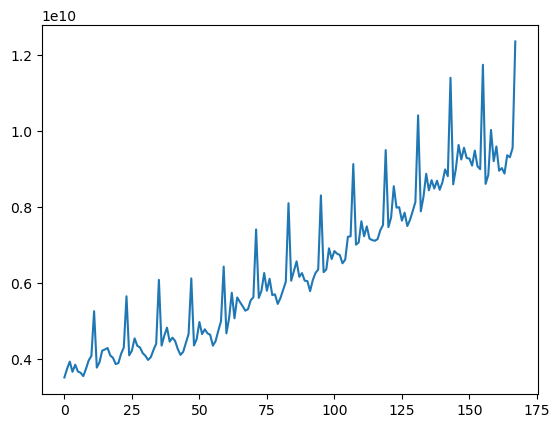

In [6]:
# numpyを使う
# ここでは元系列のまま分析を行う
series = np.loadtxt("../public/full_monthly_sales_without_header.csv")
plt.plot(series)
plt.show()

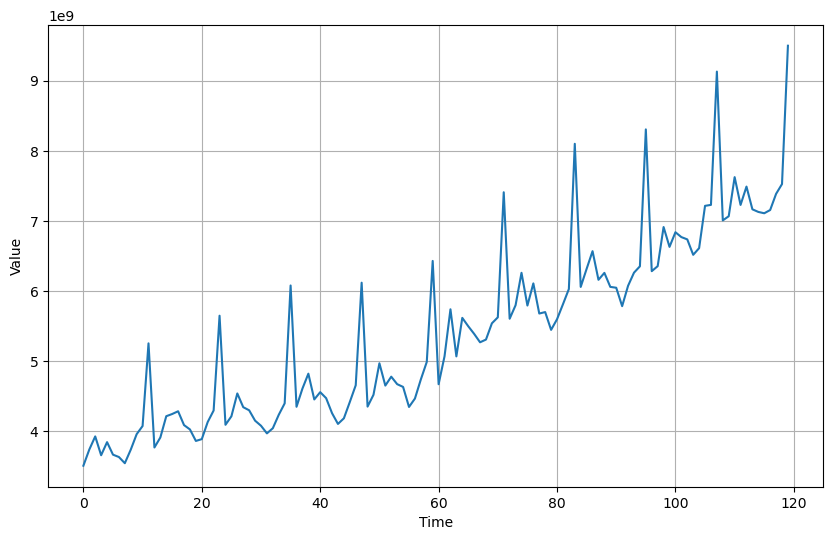

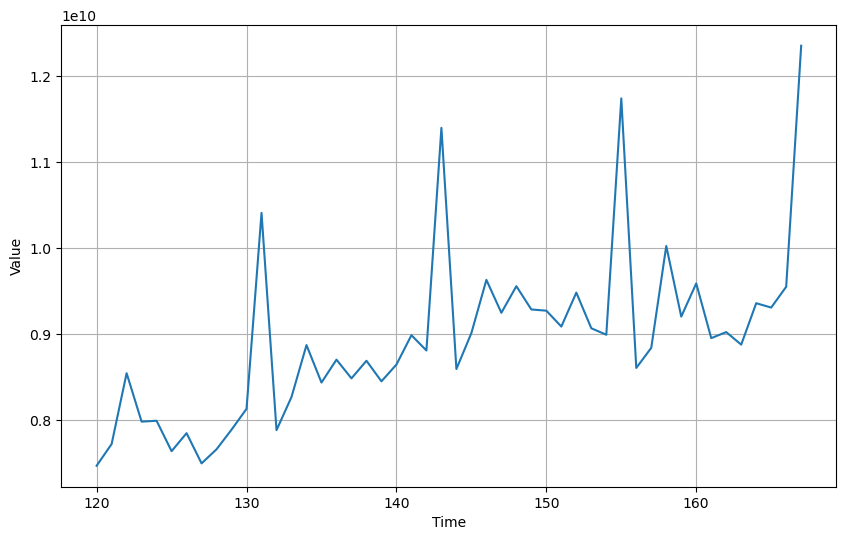

In [7]:
# 前半120時点を学習データ、以降を48時点を検証データとして分割

split_time = 120
time = np.arange(168, dtype="float32")

time_train = time[:split_time]
x_train = series[:split_time]
time_train_pred = time[20:split_time]
time_valid = time[split_time:168]
x_valid = series[split_time:168]

window_size = 20
batch_size = 20
shuffle_buffer_size = 1000

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

plt.figure(figsize=(10, 6))
plot_series(time_train, x_train) # 学習セット
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid) # 検証セット
plt.show()

In [8]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [10]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(SimpleRNN(100, input_shape=[None, 1], return_sequences=True, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


5/5 [==============================] - 2s 152ms/step - loss: 102.6881
Epoch 2/500
5/5 [==============================] - 0s 6ms/step - loss: 102.4921
Epoch 3/500
5/5 [==============================] - 0s 6ms/step - loss: 102.3208
Epoch 4/500
5/5 [==============================] - 0s 6ms/step - loss: 102.1685
Epoch 5/500
5/5 [==============================] - 0s 5ms/step - loss: 102.0263
Epoch 6/500
5/5 [==============================] - 0s 6ms/step - loss: 101.8908
Epoch 7/500
5/5 [==============================] - 0s 6ms/step - loss: 101.7613
Epoch 8/500
5/5 [==============================] - 0s 5ms/step - loss: 101.6376
Epoch 9/500
5/5 [==============================] - 0s 6ms/step - loss: 101.5193
Epoch 10/500
5/5 [==============================] - 0s 5ms/step - loss: 101.4049
Epoch 11/500
5/5 [==============================] - 0s 6ms/step - loss: 101.2963
Epoch 12/500
5/5 [==============================] - 0s 6ms/step - loss: 101.1920
Epoch 13/500
5/5 [=============================

5/5 [==============================] - 0s 9ms/step - loss: 99.9661
Epoch 103/500
5/5 [==============================] - 0s 9ms/step - loss: 99.9648
Epoch 104/500
5/5 [==============================] - 0s 8ms/step - loss: 99.9636
Epoch 105/500
5/5 [==============================] - 0s 7ms/step - loss: 99.9623
Epoch 106/500
5/5 [==============================] - 0s 6ms/step - loss: 99.9611
Epoch 107/500
5/5 [==============================] - 0s 6ms/step - loss: 99.9599
Epoch 108/500
5/5 [==============================] - 0s 6ms/step - loss: 99.9586
Epoch 109/500
5/5 [==============================] - 0s 6ms/step - loss: 99.9575
Epoch 110/500
5/5 [==============================] - 0s 5ms/step - loss: 99.9563
Epoch 111/500
5/5 [==============================] - 0s 6ms/step - loss: 99.9551
Epoch 112/500
5/5 [==============================] - 0s 6ms/step - loss: 99.9539
Epoch 113/500
5/5 [==============================] - 0s 5ms/step - loss: 99.9527
Epoch 114/500
5/5 [=======================

5/5 [==============================] - 0s 5ms/step - loss: 99.7916
Epoch 204/500
5/5 [==============================] - 0s 6ms/step - loss: 99.7852
Epoch 205/500
5/5 [==============================] - 0s 6ms/step - loss: 99.7786
Epoch 206/500
5/5 [==============================] - 0s 7ms/step - loss: 99.7724
Epoch 207/500
5/5 [==============================] - 0s 8ms/step - loss: 99.7668
Epoch 208/500
5/5 [==============================] - 0s 5ms/step - loss: 99.7616
Epoch 209/500
5/5 [==============================] - 0s 5ms/step - loss: 99.7568
Epoch 210/500
5/5 [==============================] - 0s 6ms/step - loss: 99.7522
Epoch 211/500
5/5 [==============================] - 0s 5ms/step - loss: 99.7479
Epoch 212/500
5/5 [==============================] - 0s 5ms/step - loss: 99.7436
Epoch 213/500
5/5 [==============================] - 0s 5ms/step - loss: 99.7394
Epoch 214/500
5/5 [==============================] - 0s 5ms/step - loss: 99.7352
Epoch 215/500
5/5 [=======================

5/5 [==============================] - 0s 7ms/step - loss: 69.0120
Epoch 305/500
5/5 [==============================] - 0s 6ms/step - loss: 67.2303
Epoch 306/500
5/5 [==============================] - 0s 6ms/step - loss: 65.3376
Epoch 307/500
5/5 [==============================] - 0s 5ms/step - loss: 63.2859
Epoch 308/500
5/5 [==============================] - 0s 6ms/step - loss: 61.0366
Epoch 309/500
5/5 [==============================] - 0s 5ms/step - loss: 58.5386
Epoch 310/500
5/5 [==============================] - 0s 5ms/step - loss: 55.7029
Epoch 311/500
5/5 [==============================] - 0s 7ms/step - loss: 52.4904
Epoch 312/500
5/5 [==============================] - 0s 5ms/step - loss: 48.7902
Epoch 313/500
5/5 [==============================] - 0s 5ms/step - loss: 44.5251
Epoch 314/500
5/5 [==============================] - 0s 5ms/step - loss: 39.5406
Epoch 315/500
5/5 [==============================] - 0s 5ms/step - loss: 33.6400
Epoch 316/500
5/5 [=======================

5/5 [==============================] - 0s 6ms/step - loss: 12.6894
Epoch 406/500
5/5 [==============================] - 0s 7ms/step - loss: 12.6920
Epoch 407/500
5/5 [==============================] - 0s 5ms/step - loss: 12.6732
Epoch 408/500
5/5 [==============================] - 0s 8ms/step - loss: 12.6551
Epoch 409/500
5/5 [==============================] - 0s 8ms/step - loss: 12.6493
Epoch 410/500
5/5 [==============================] - 0s 7ms/step - loss: 12.6393
Epoch 411/500
5/5 [==============================] - 0s 9ms/step - loss: 12.6061
Epoch 412/500
5/5 [==============================] - 0s 6ms/step - loss: 12.5926
Epoch 413/500
5/5 [==============================] - 0s 6ms/step - loss: 12.5903
Epoch 414/500
5/5 [==============================] - 0s 7ms/step - loss: 12.5814
Epoch 415/500
5/5 [==============================] - 0s 8ms/step - loss: 12.6165
Epoch 416/500
5/5 [==============================] - 0s 6ms/step - loss: 12.5355
Epoch 417/500
5/5 [=======================